In [1]:
# %config InlineBackend.figure_formats = ['svg']

In [2]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split


In [3]:
from matplotlib.colors import  ListedColormap
import matplotlib.ticker as mtick

In [4]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [5]:
morder = ['MIXOTROPH', 'OVERFLOW', 'EXOENZYME',  'ROS',]
media_order = ['lowN', 'pro99']
mpalette = [ '#84dcc6', '#426b69', '#9b7874', '#b191ff', ]
#mpalette = sns.color_palette(mpalette)
#morder = [morder[1]] + morder[3:]
#mpalette = [mpalette[1]] + mpalette[3:]
sns.color_palette(mpalette)

[(0.5176470588235295, 0.8627450980392157, 0.7764705882352941),
 (0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0)]

In [6]:
vorder1 = ['Versatile VPRO', 'Positive VPRO', 'Negative VPRO',  ]
vorder1 = ['Versatile VPRO','Non-Versatile VPRO',  ]

vpalette1 = [gpalette[1], gpalette[0], gpalette[3], gpalette[4], ]
vpalette1 = ['#5e392f', gpalette[1], gpalette[3],  ]
vpalette1 = [
    '#5E392F', 
    #'#DC267F',
    #'#FE6100',
    '#648FFF',
    #'#785EF0',
]
print (vorder1)
sns.color_palette(vpalette1)

['Versatile VPRO', 'Non-Versatile VPRO']


[(0.3686274509803922, 0.2235294117647059, 0.1843137254901961),
 (0.39215686274509803, 0.5607843137254902, 1.0)]

In [7]:
morder

['MIXOTROPH', 'OVERFLOW', 'EXOENZYME', 'ROS']

In [8]:
mmap = {
    'EXOENZYME' : 'E', 
    'EXOENZYME-MIXOTROPH' : 'EM' , 
    'EXOENZYME-ROS' : 'ER',
       'EXOENZYME-ROS-MIXOTROPH' : 'ERM', 
    'MIN' : '-', 
    'MIXOTROPH' : 'M',
    'OVERFLOW' : 'O',
       'OVERFLOW-EXOENZYME' : 'EO',
    'OVERFLOW-EXOENZYME-MIXOTROPH' : 'EOM',
       'OVERFLOW-MIXOTROPH' : 'OM',
    'OVERFLOW-ROS' : 'OR', 
    'OVERFLOW-ROS-EXOENZYME' : 'EOR',
       'OVERFLOW-ROS-MIXOTROPH' : 'ORM', 
    'ROS' : 'R', 
    'ROS-MIXOTROPH' : 'RM',
       'ROS-MIXOTROPH-OVERFLOW-EXOENZYME' : 'EORM',
}

In [9]:
import os
import glob
dpath = '../results/final/het/'
#glob.glob(os.path.join(dpath, 'versatile_vpros_*'))

In [10]:
def _readvfile(fname):
    for category in ['add', 'extend', 'round2', 'init']:
        if category in fname:
            break
    print (fname, category)
    df = pd.read_csv(fname)
    df['Phase'] = category
    return df
vpro_df = pd.concat([_readvfile(f) for f in glob.glob(os.path.join(dpath, 'versatile_vpros_*'))], ignore_index=True)


../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_EXOENZYME-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-EXOENZYME.csv extend
../results/final/het/versatile_vpros_monte_het_extend_100per_vpro_MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW.csv extend
../results/final/het/versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW.csv extend
../results/final/het/versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW-ROS-MIXOTROPH.csv extend
../results/final/het/versatile_vpros_monte_het_extend_OVERFLOW-ROS.csv extend
../results/final/het/versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW-ROS.csv extend
../results/final/het/versatile_vpros_monte_het_extend_ROS.csv extend
../results/final/het/versatile_vpros_monte_het_extend_100per_vpro_OVERFLOW-ROS-EXOENZYME.csv extend
../results/final/het/versatile_vpros_monte_het_add_10

In [11]:
vpro_df.VPRO = vpro_df.VPRO.str.replace('_monte_', '' ,regex=False)

In [12]:
vpro_df

,model,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile,Phase
0,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_11_20_OVERFLOW-EXOENZYME-MIXOTROPH__0_O...,4,0,0.0,0.0,0.0,0,0,4,False,extend
1,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_11_20_OVERFLOW-EXOENZYME-MIXOTROPH__14_...,10,1,0.0,0.0,1.0,0,1,10,True,extend
2,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_11_20_OVERFLOW-EXOENZYME-MIXOTROPH__16_...,0,0,0.0,0.0,0.0,8,0,8,False,extend
3,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_11_20_OVERFLOW-EXOENZYME-MIXOTROPH__1_O...,2,2,0.0,0.0,0.0,0,0,2,False,extend
4,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_11_20_OVERFLOW-EXOENZYME-MIXOTROPH__21_...,3,3,0.0,0.0,0.0,0,0,3,False,extend
...,...,...,...,...,...,...,...,...,...,...,...,...
38907,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_96_6_OVERFLOW-EXOENZYME-MIXOTROPH__80_O...,0,22,17.0,0.0,49.0,4,49,4,True,extend
38908,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_96_6_OVERFLOW-EXOENZYME-MIXOTROPH__88_O...,0,33,0.0,0.0,0.0,11,0,11,False,extend
38909,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_96_6_OVERFLOW-EXOENZYME-MIXOTROPH__8_OV...,0,13,20.0,0.0,35.0,11,35,11,True,extend
38910,OVERFLOW-EXOENZYME-MIXOTROPH,vpro_3_96_6_OVERFLOW-EXOENZYME-MIXOTROPH__91_O...,0,33,36.0,0.0,18.0,6,18,6,True,extend


In [13]:
vpro_df = vpro_df.groupby(['model', 'Phase', 'VPRO', ]).sum().reset_index()

In [14]:
vpro_df['Versatile'] = vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1)

In [15]:
vpro_df['simulations_per_VPRO']  = vpro_df[gorder].sum(axis=1)

In [16]:
vpro_df['Versatile_STR'] = vpro_df.Versatile.map({True: 'Versatile VPRO',False: 'Non-Versatile VPRO',  })
#vpro_df.loc[vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Positive VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'
#vpro_df.loc[~vpro_df.pos_interaction.ge(1) & ~vpro_df.neg_interaction.ge(1), 'Versatile_STR'] = 'Negative VPRO'



In [17]:
vorder = ['Versatile VPRO','Non-Versatile VPRO',  ]
vpalette = [ '#FF8E8F', '#9c110b']
vpalette = [ 'black', '#9c110b']

sns.color_palette(vpalette)

[(0.0, 0.0, 0.0),
 (0.611764705882353, 0.06666666666666667, 0.043137254901960784)]

In [18]:
vpro_df['MODEL'] = vpro_df.model.map(mmap)
for m in morder:
    vpro_df[m] = vpro_df.model.str.contains(m)

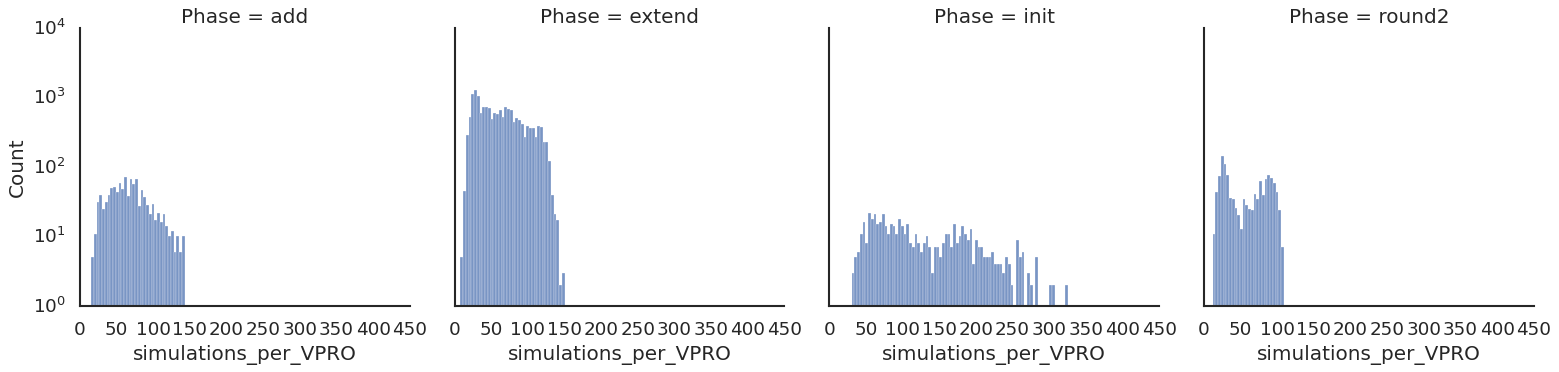

In [19]:
sns.set_context('talk')
sns.displot(
    data=vpro_df,
    col='Phase', 
    x='simulations_per_VPRO',
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False),
).set(yscale='log')

In [20]:
vpro_df.groupby('Versatile_STR').simulations_per_VPRO.describe().T

Versatile_STR,Non-Versatile VPRO,Versatile VPRO
count,15534.000000,4242.000000
mean,55.601390,96.740453
std,30.516146,30.875717
min,8.000000,17.000000
25%,31.000000,77.000000
50%,49.000000,94.000000
75%,73.000000,113.000000
max,427.000000,366.000000


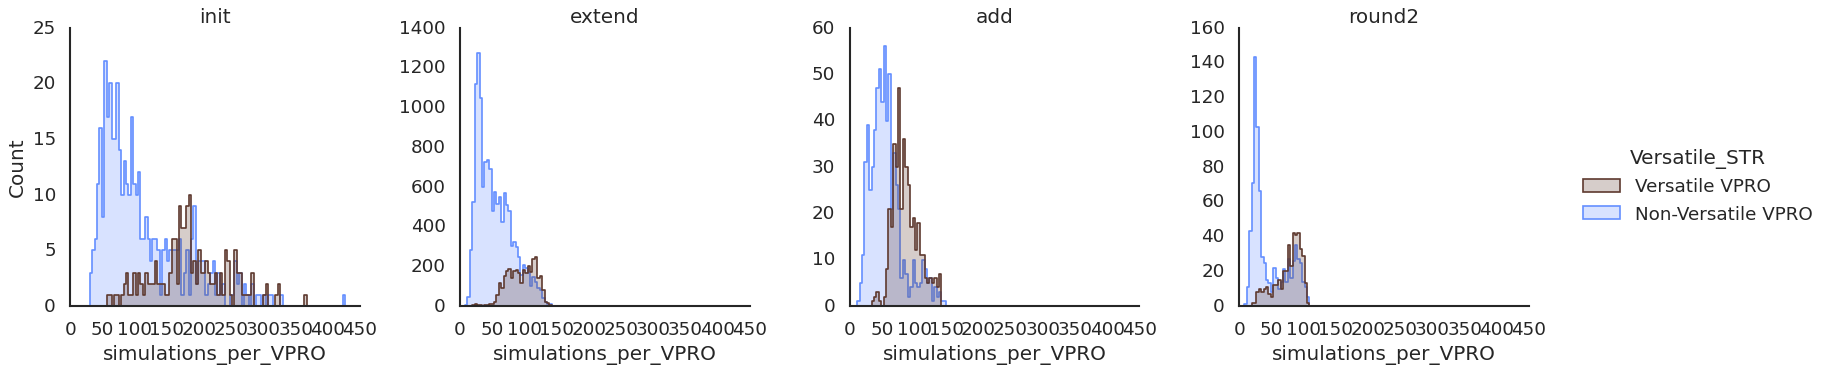

In [21]:
sns.set_context('talk')
g = sns.displot(
    data=vpro_df,
    col='Phase', col_order=['init', 'extend', 'add', 'round2'],
    hue='Versatile_STR', palette=vpalette1, hue_order=vorder1,
    x='simulations_per_VPRO', #multiple='stack',
    element='step', #fill=False,
    
    #aspect=3,
    #log_scale=True,
    facet_kws=dict(sharex=False, sharey=False),
)#.set(yscale='log').
g.set_titles(col_template='{col_name}')

In [22]:
vpro_df.loc[vpro_df.simulations_per_VPRO.le(20)].shape, vpro_df.shape

((544, 19), (19776, 19))

In [23]:
vpro_df.groupby(['Phase', ]).size()

Phase
add        1070
extend    16874
init        610
round2     1222
dtype: int64

In [24]:
count_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend'])].groupby(['model'])[gorder].sum().reset_index()
count_df['MODEL'] = count_df.model.map(mmap)
for m in morder:
    count_df[m] = count_df.model.str.contains(m)
count_df

count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,True,False,False,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,True,True,False,False


In [25]:
count_init_df = vpro_df.loc[vpro_df.Phase.isin(['init'])].groupby(['model'])[gorder].sum().reset_index()
count_init_df['MODEL'] = count_init_df.model.map(mmap)
for m in morder:
    count_init_df[m] = count_init_df.model.str.contains(m)
count_init_df

count_init_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,35.0,1741.0,1,1011,2623,902.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,0.0,271.0,49,888,2299,509.0,EM,True,False,True,False
2,EXOENZYME-ROS,253.0,1290.0,0,1112,2327,937.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,363.0,972.0,0,1323,1656,857.0,ERM,True,False,True,True
4,MIN,0.0,0.0,2,1500,623,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,0.0,0,1335,1058,0.0,M,True,False,False,False
6,OVERFLOW,5.0,182.0,14,1852,2656,192.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,86.0,2296.0,1,1254,3521,843.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,167.0,1812.0,89,1208,2948,982.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,5.0,246.0,6,2003,2952,215.0,OM,True,True,False,False


In [26]:
count_ver_df = vpro_df.loc[vpro_df.Phase.isin(['init', 'extend']) & vpro_df.Versatile].groupby(['model'])[gorder].sum().reset_index()
count_ver_df['MODEL'] = count_ver_df.model.map(mmap)
for m in morder:
    count_ver_df[m] = count_ver_df.model.str.contains(m)
count_ver_df



,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,37.0,5675.0,4,3131,5080,2886.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,3.0,2672.0,286,1620,4975,2263.0,EM,True,False,True,False
2,EXOENZYME-ROS,252.0,10188.0,7,4859,6417,4757.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,269.0,13140.0,4,7174,7837,7901.0,ERM,True,False,True,True
4,MIXOTROPH,0.0,12.0,0,56,162,84.0,M,True,False,False,False
5,OVERFLOW,78.0,1263.0,2,10620,10246,1389.0,O,False,True,False,False
6,OVERFLOW-EXOENZYME,25.0,13098.0,2,5088,11199,4865.0,EO,False,True,True,False
7,OVERFLOW-EXOENZYME-MIXOTROPH,5.0,12317.0,259,5035,9789,4462.0,EOM,True,True,True,False
8,OVERFLOW-MIXOTROPH,30.0,2361.0,102,10526,14212,1958.0,OM,True,True,False,False
9,OVERFLOW-ROS,711.0,1775.0,8,13444,7964,5019.0,OR,False,True,False,True


In [27]:
count_ver_init_df = vpro_df.loc[vpro_df.Phase.isin(['init', ]) & vpro_df.Versatile].groupby(['model'])[gorder].sum().reset_index()
count_ver_init_df['MODEL'] = count_ver_init_df.model.map(mmap)
for m in morder:
    count_ver_init_df[m] = count_ver_init_df.model.str.contains(m)
count_ver_init_df



,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,1.0,1193.0,1,605,997,599.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,0.0,164.0,49,63,479,292.0,EM,True,False,True,False
2,EXOENZYME-ROS,0.0,1032.0,0,518,666,394.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,1.0,954.0,0,534,572,597.0,ERM,True,False,True,True
4,OVERFLOW,5.0,182.0,0,940,1312,150.0,O,False,True,False,False
5,OVERFLOW-EXOENZYME,0.0,1949.0,1,507,1544,553.0,EO,False,True,True,False
6,OVERFLOW-EXOENZYME-MIXOTROPH,0.0,977.0,7,440,581,283.0,EOM,True,True,True,False
7,OVERFLOW-MIXOTROPH,5.0,246.0,0,735,1395,199.0,OM,True,True,False,False
8,OVERFLOW-ROS,68.0,245.0,1,1148,856,625.0,OR,False,True,False,True
9,OVERFLOW-ROS-EXOENZYME,134.0,1162.0,0,785,369,890.0,EOR,False,True,True,True


In [28]:
count_init_df.loc[count_init_df.model.isin(morder)].groupby('model')[gorder].sum().sum(axis=1)

model
EXOENZYME    6313.0
MIXOTROPH    2393.0
OVERFLOW     4901.0
ROS          2216.0
dtype: float64

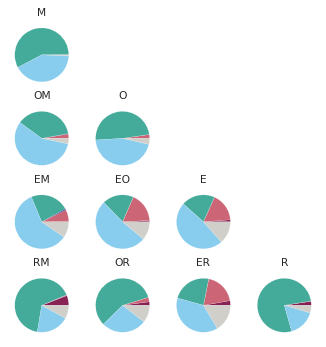

In [29]:
sns.set_context('paper')
fig, axes = plt.subplots(4,4, figsize=(5,5))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder):
    for i2,m2 in enumerate(morder):
        if i1 >= i2:
            othercols = [m for m in morder if m not in [m1, m2]]
            tmpdf =count_df.loc[count_df[m1] & count_df[m2] & ~count_df[othercols].any(axis=1) ]
            tmpdf.index = tmpdf.MODEL
            t=tmpdf[gorder].T.squeeze()
            #_wedges, labels, percentages = 
            axes[i1,i2].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
               wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                                           #labels=t.index, autopct='%1.1f%%', 
                  )
            axes[i1,i2].set(title=tmpdf.MODEL.unique()[0])
        else: 
            axes[i1,i2].axis('off')
            
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


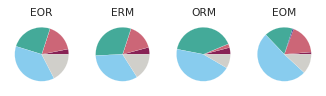

In [30]:
sns.set_context('paper')
fig, axes = plt.subplots(1,4, figsize=(5,5))# , sharex=True)# , sharey=True)
for i1,m1 in enumerate(morder):
    #for i2,m2 in enumerate(morder):
        othercols = [m for m in morder if m not in [m1]]
        tmpdf =count_df.loc[~count_df[m1] & count_df[othercols].all(axis=1) ]
        tmpdf.index = tmpdf.MODEL
        #print(tmpdf)
        t=tmpdf[gorder].T.squeeze()
    
        #_wedges, labels, percentages = 
        axes[i1].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
           wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                                       #labels=t.index, autopct='%1.1f%%', 
              )
        axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


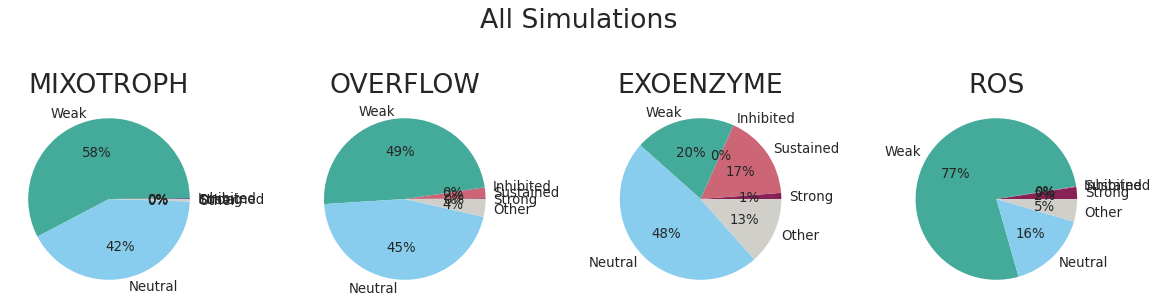

In [31]:
sns.set_context('poster')
fig, axes = plt.subplots(1,4, figsize=(15,5))# , sharex=True)# , sharey=True)
for ax,m1 in zip(axes,morder):
    tmpdf =count_df.loc[count_df.model.isin([m1]) ]
    t=tmpdf[gorder].T.squeeze()

    ax.pie(
        t, colors=gpalette, #title=m1,
        wedgeprops={'linewidth': 0.01, 'edgecolor': 'white'},
        labels=t.index, autopct='%1.0f%%', textprops={'fontsize': 12},
        
          )
    ax.set_title(m1)
plt.tight_layout()
plt.suptitle('All Simulations')
plt.show()
        #axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


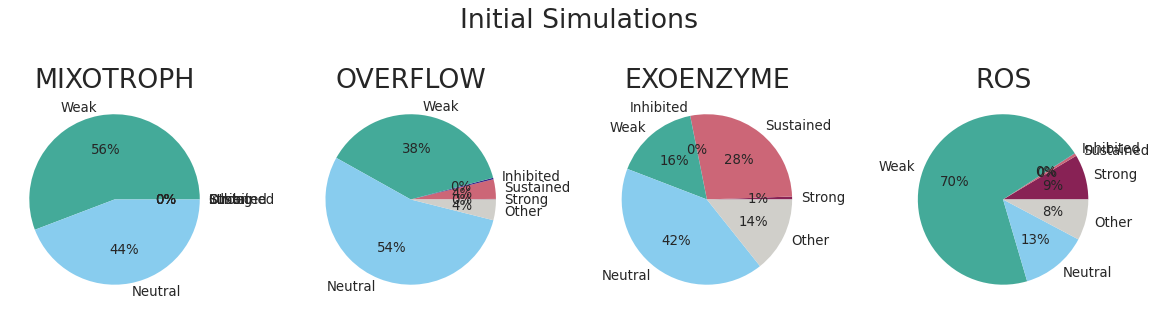

In [32]:
sns.set_context('poster')
fig, axes = plt.subplots(1,4, figsize=(15,5))# , sharex=True)# , sharey=True)
for ax,m1 in zip(axes,morder):
    tmpdf =count_init_df.loc[count_df.model.isin([m1]) ]
    t=tmpdf[gorder].T.squeeze()

    ax.pie(
        t, colors=gpalette, #title=m1,
        wedgeprops={'linewidth': 0.01, 'edgecolor': 'white'},
        labels=t.index, autopct='%1.0f%%', textprops={'fontsize': 12},
        
          )
    ax.set_title(m1)
plt.tight_layout()
plt.suptitle('Initial Simulations')
plt.show()
        #axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


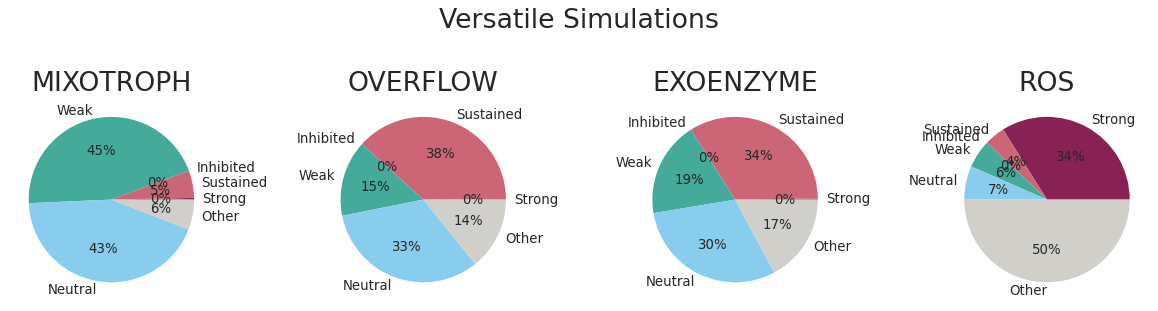

In [33]:
sns.set_context('poster')
fig, axes = plt.subplots(1,4, figsize=(15,5))# , sharex=True)# , sharey=True)
for ax,m1 in zip(axes,morder):
    tmpdf =count_ver_df.loc[count_df.model.isin([m1]) ]
    t=tmpdf[gorder].T.squeeze()

    ax.pie(
        t, colors=gpalette, #title=m1,
        wedgeprops={'linewidth': 0.01, 'edgecolor': 'white'},
        labels=t.index, autopct='%1.0f%%', textprops={'fontsize': 12},
        
          )
    ax.set_title(m1)
plt.tight_layout()
plt.suptitle('Versatile Simulations')
plt.show()
        #axes[i1].set(title=tmpdf.MODEL.unique()[0])
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


[Text(0.5, 1.0, '-')]

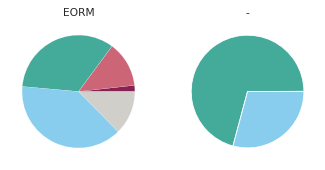

In [34]:
sns.set_context('paper')
fig, axes = plt.subplots(1,2, figsize=(5,5))# , sharex=True)# , sharey=True)
tmpdf =count_df.loc[count_df[morder].all(axis=1) ]
tmpdf.index = tmpdf.MODEL
#print(tmpdf)
t=tmpdf[gorder].T.squeeze()

#_wedges, labels, percentages = 
axes[0].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
           wedgeprops={'linewidth': 0.1, 'edgecolor': 'white'},
                                               #labels=t.index, autopct='%1.1f%%', 
      )
axes[0].set(title=tmpdf.MODEL.unique()[0])
#tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


tmpdf =count_df.loc[~count_df[morder].any(axis=1) ]
tmpdf.index = tmpdf.MODEL
#print(tmpdf)
t=tmpdf[gorder].T.squeeze()

#_wedges, labels, percentages = 
axes[1].pie(t, colors=gpalette, #title=tmpdf.MODEL.unique()[0],
   #wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                               #labels=t.index, autopct='%1.1f%%', 
      )
axes[1].set(title=tmpdf.MODEL.unique()[0])
#tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)


In [35]:
sns.set_context('paper')

In [36]:
vcount_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend'])
    ].pivot_table(
        index='MODEL', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [37]:
vcount_df = vcount_df.reindex(columns=vorder1)
vcount_df = vcount_df.sort_values(by=vorder1,ascending=False)

<Axes: title={'center': 'VPROs per model'}, xlabel='MODEL', ylabel='number of VPROs'>

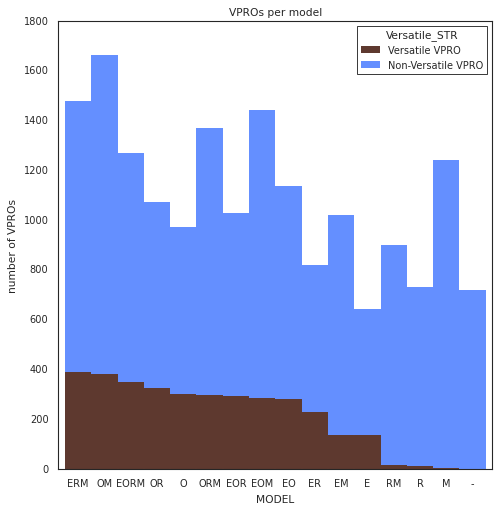

In [38]:
vcount_df.plot(
    kind='bar', stacked=True, color=vpalette1, width=1, figsize=(7,7), rot=0, lw=0.01, ylabel='number of VPROs', title='VPROs per model'
)

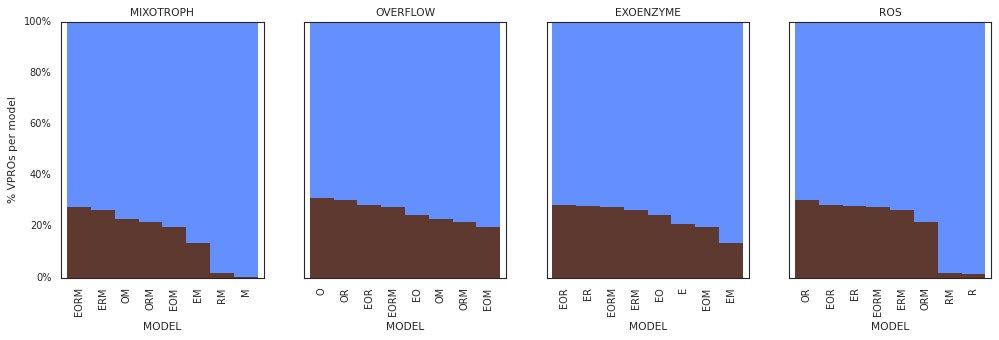

In [39]:
fig, axes = plt.subplots(1,4, figsize=(15,4) , sharey=True)# , sharey=True)

for m, ax in zip(morder, axes):
    
    vcdf = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) & vpro_df[m]
    ].pivot_table(
        index='MODEL', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )    
    vcdf = vcdf.reindex(columns=vorder1)
    vcdf = vcdf.div(vcdf.sum(axis=1), axis=0) * 100
    vcdf = vcdf.sort_values(by=vorder1,ascending=False)
    vcdf.plot(
        kind='bar', stacked=True, color=vpalette1, width=1, #figsize=(7,7), 
        #rot=0, 
        lw=0.01, ax=ax, legend=False, title=m, ylabel='% VPROs per model'
        
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    

In [40]:
vcount1_df = vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [41]:
vcount1_init_df = vpro_df.loc[
        vpro_df.Phase.isin(['init']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

In [42]:
vpro_df.columns

Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
       'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
       'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'MIXOTROPH',
       'OVERFLOW', 'EXOENZYME', 'ROS'],
      dtype='object')

In [43]:
vpro_df.loc[
        vpro_df.Phase.isin(['init']) &
        vpro_df.model.isin(morder) & ~vpro_df.Versatile & vpro_df.neg_interaction.gt(1)
    ][['model', 'pos_interaction', #'neg_interaction' 
      ]].value_counts().head(50)


model      pos_interaction
MIXOTROPH  0                  30
OVERFLOW   0                  29
ROS        0                  29
EXOENZYME  0                  10
Name: count, dtype: int64

In [44]:
vpro_df.loc[
        vpro_df.Phase.isin(['init']) &
        vpro_df.model.isin(morder) & ~vpro_df.Versatile & vpro_df.pos_interaction.gt(1)
    ][['model', 'neg_interaction', #'neg_interaction' 
      ]].value_counts().head(50)


model      neg_interaction
EXOENZYME  0                  6
Name: count, dtype: int64

In [45]:
vpro_df.loc[
        vpro_df.Phase.isin(['init']) &
        vpro_df.model.isin(morder)
    ].pivot_table(
        index='model', columns='Versatile_STR',
        values='VPRO', aggfunc='count',fill_value=0 )

Versatile_STR,Non-Versatile VPRO,Versatile VPRO
model,,
EXOENZYME,24,19
MIXOTROPH,35,0
OVERFLOW,30,25
ROS,29,1


In [46]:
vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)&
        vpro_df.Versatile_STR.isin(['Versatile VPRO'])
].groupby(['model', 'Versatile_STR']).size()

model      Versatile_STR 
EXOENZYME  Versatile VPRO    135
MIXOTROPH  Versatile VPRO      4
OVERFLOW   Versatile VPRO    300
ROS        Versatile VPRO     11
dtype: int64

In [47]:
vpro_df.loc[
        vpro_df.Phase.isin(['init',]) &
        vpro_df.model.isin(morder)&
        vpro_df.Versatile_STR.isin(['Versatile VPRO'])
].groupby(['model', 'Versatile_STR']).size()

model      Versatile_STR 
EXOENZYME  Versatile VPRO    19
OVERFLOW   Versatile VPRO    25
ROS        Versatile VPRO     1
dtype: int64

In [48]:
vpro_df

,model,Phase,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,neg_interaction,Versatile,simulations_per_VPRO,Versatile_STR,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_15,0,0,0.0,0.0,0.0,24,0,24,False,24.0,Non-Versatile VPRO,E,False,False,True,False
1,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_20,0,1,2.0,0.0,9.0,77,9,77,True,89.0,Versatile VPRO,E,False,False,True,False
2,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_22,0,0,0.0,0.0,0.0,27,0,27,False,27.0,Non-Versatile VPRO,E,False,False,True,False
3,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_32,0,3,0.0,0.0,0.0,23,0,23,False,26.0,Non-Versatile VPRO,E,False,False,True,False
4,EXOENZYME,add,vpro_11_62_EXOENZYME_C1_37,0,29,0.0,0.0,0.0,35,0,35,False,64.0,Non-Versatile VPRO,E,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19771,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_82_9_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,0,0.0,0.0,0.0,209,0,209,False,209.0,Non-Versatile VPRO,EORM,True,True,True,True
19772,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_86_79_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,19,4.0,0.0,0.0,237,0,237,False,260.0,Non-Versatile VPRO,EORM,True,True,True,True
19773,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_95_6_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,16,56.0,236.0,1.0,0,237,0,False,309.0,Non-Versatile VPRO,EORM,True,True,True,True
19774,ROS-MIXOTROPH-OVERFLOW-EXOENZYME,init,vpro_97_54_ROS-MIXOTROPH-OVERFLOW-EXOENZYME,0,127,123.0,0.0,17.0,15,17,15,True,282.0,Versatile VPRO,EORM,True,True,True,True


In [49]:
t= vpro_df.loc[
        vpro_df.Phase.isin(['init', 'extend']) &
        vpro_df.model.isin(morder)
        
].groupby(['model'])[['simulations_per_VPRO', 'pos_interaction', 'neg_interaction', 'Neutral', 'Weak']].sum()
t['% pos'] = t['pos_interaction'] / t['simulations_per_VPRO'] 
t['% neg'] = t['neg_interaction'] / t['simulations_per_VPRO'] 
t['% neutral'] = t['Neutral'] / t['simulations_per_VPRO'] 
t['% Weak'] = t['Weak'] / t['simulations_per_VPRO'] 
t['% Weak/neutral'] = (t['Weak'] + t['Neutral']) / t['simulations_per_VPRO'] 

t

,simulations_per_VPRO,pos_interaction,neg_interaction,Neutral,Weak,% pos,% neg,% neutral,% Weak,% Weak/neutral
model,,,,,,,,,,
EXOENZYME,50890.0,9322,10227,24513,10217,0.183179,0.200963,0.481686,0.200766,0.682452
MIXOTROPH,36710.0,12,21175,15344,21119,0.000327,0.576818,0.417979,0.575293,0.993272
OVERFLOW,61208.0,1402,29814,27817,29791,0.022906,0.487093,0.454467,0.486717,0.941184
ROS,22671.0,566,17441,3634,17424,0.024966,0.769309,0.160293,0.768559,0.928852


In [50]:
vcount1_df = vcount1_df.reindex(columns=vorder1, index=morder)
#vcoun1_df = vcount1_df.sort_values(by=vorder1)

In [51]:
vcount1_init_df = vcount1_init_df.reindex(columns=vorder1, index=morder)
#vcoun1_df = vcount1_df.sort_values(by=vorder1)

In [52]:
sns.set_context('poster')

In [53]:
vcount1_df.columns.name = None
vcount1_df.columns

Index(['Versatile VPRO', 'Non-Versatile VPRO'], dtype='object')

In [54]:
vcount1_init_df.columns.name = None
vcount1_init_df.columns

Index(['Versatile VPRO', 'Non-Versatile VPRO'], dtype='object')

In [55]:
count_init_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,35.0,1741.0,1,1011,2623,902.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,0.0,271.0,49,888,2299,509.0,EM,True,False,True,False
2,EXOENZYME-ROS,253.0,1290.0,0,1112,2327,937.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,363.0,972.0,0,1323,1656,857.0,ERM,True,False,True,True
4,MIN,0.0,0.0,2,1500,623,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,0.0,0,1335,1058,0.0,M,True,False,False,False
6,OVERFLOW,5.0,182.0,14,1852,2656,192.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,86.0,2296.0,1,1254,3521,843.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,167.0,1812.0,89,1208,2948,982.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,5.0,246.0,6,2003,2952,215.0,OM,True,True,False,False


In [56]:
print(vcount1_df.sum(axis=1))


model
MIXOTROPH    1239
OVERFLOW      970
EXOENZYME     641
ROS           728
dtype: int64


In [57]:
print(vcount1_init_df.sum(axis=1))


model
MIXOTROPH    35
OVERFLOW     55
EXOENZYME    43
ROS          30
dtype: int64


In [58]:
vcount1_df = vcount1_df.div(vcount1_df.sum(axis=1), axis=0) * 100


In [59]:
vcount1_init_df = vcount1_init_df.div(vcount1_init_df.sum(axis=1), axis=0) * 100


In [60]:
vcount1_init_df

,Versatile VPRO,Non-Versatile VPRO
model,,
MIXOTROPH,0.000000,100.000000
OVERFLOW,45.454545,54.545455
EXOENZYME,44.186047,55.813953
ROS,3.333333,96.666667


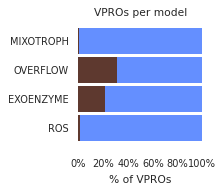

In [61]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder))

vcount1_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


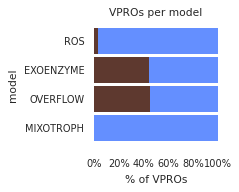

In [62]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder))

vcount1_init_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


In [63]:
vcount1_df

,Versatile VPRO,Non-Versatile VPRO
ROS,1.510989,98.489011
EXOENZYME,21.060842,78.939158
OVERFLOW,30.927835,69.072165
MIXOTROPH,0.322841,99.677159


In [64]:
vpro_df['% positive'] = vpro_df.pos_interaction / vpro_df.simulations_per_VPRO

In [65]:
vpro_df.loc[vpro_df.Versatile & vpro_df.model.isin(morder) & vpro_df.Phase.isin(['init', 'extend'])].groupby('model')['% positive'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
EXOENZYME,135.0,0.325533,0.168378,0.010101,0.116151,0.396694,0.436932,0.555556
MIXOTROPH,4.0,0.036718,0.028489,0.011905,0.023810,0.028595,0.041503,0.077778
OVERFLOW,300.0,0.055223,0.032956,0.008547,0.028882,0.049575,0.073070,0.172932
ROS,11.0,0.371830,0.280618,0.042105,0.148166,0.280374,0.672833,0.758491


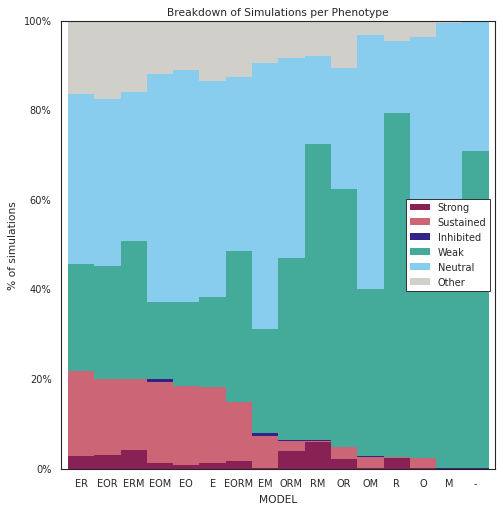

In [66]:

#cdf = count_df.copy()
cdf = count_df[gorder].div(count_df[gorder].sum(axis=1), axis=0) * 100

cdf.index=count_df.MODEL
cdf['pos'] = cdf[['Strong','Sustained']].sum(axis=1)
cdf['neg'] = cdf[['Inhibited','Weak']].sum(axis=1)
cdf = cdf.sort_values(by=['pos', 'neg',], ascending=False)
cdf[gorder].plot(
    kind='bar', stacked=True, color=gpalette, width=1, figsize=(7,7), rot=0, lw=0.01, 
    ylabel='% of simulations', title='Breakdown of Simulations per Phenotype'
)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())


In [67]:
count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,True,False,False,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,True,True,False,False


In [68]:
sns.set_context('paper')

model
ROS          22671.0
EXOENZYME    50890.0
OVERFLOW     61208.0
MIXOTROPH    36710.0
dtype: float64


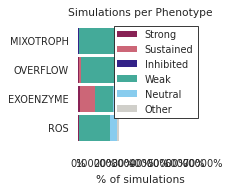

In [69]:
import matplotlib.ticker as mtick

cdf = count_df.loc[count_df['model'].isin(morder)].copy()
    
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder))
print(cdf[gorder].sum(axis=1))
#cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
cdf[gorder].plot(
    kind='barh', stacked=True, color=gpalette, width=0.9, figsize=(2,2), 
    #rot=0, 
    lw=0.01, #legend=False,
    xlabel='% of simulations', title='Simulations per Phenotype', ylabel='',
)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(bottom=True, left=True)

In [70]:
cdf

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
model,,,,,,,,,,,,
ROS,ROS,547.0,19.0,17,17424,3634,1030.0,R,False,False,False,True
EXOENZYME,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,False,False,True,False
OVERFLOW,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False
MIXOTROPH,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,True,False,False,False


In [71]:
cdf = count_df.loc[count_df['model'].isin(morder)].copy()

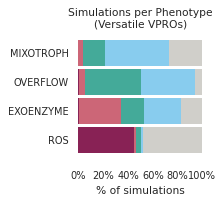

In [72]:
import matplotlib.ticker as mtick

cdf = count_ver_df.loc[count_ver_df['model'].isin(morder)].copy()
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder))
cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
cdf[gorder].plot(
    kind='barh', stacked=True, color=gpalette, width=0.9, figsize=(2,2), 
    #rot=0, 
    lw=0.01, legend=False,
    xlabel='% of simulations', title='Simulations per Phenotype\n(Versatile VPROs)', ylabel='',
)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(bottom=True, left=True)

In [73]:
count_init_df.loc[count_init_df.model.isin(morder)]


,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,35.0,1741.0,1,1011,2623,902.0,E,False,False,True,False
5,MIXOTROPH,0.0,0.0,0,1335,1058,0.0,M,True,False,False,False
6,OVERFLOW,5.0,182.0,14,1852,2656,192.0,O,False,True,False,False
13,ROS,190.0,11.0,1,1561,281,172.0,R,False,False,False,True


In [124]:
vcount1_df.index.name = 'model'
cdf = count_df.loc[count_df['model'].isin(morder)].copy()
cdf.index=cdf.model
cdf = cdf.reindex(index=reversed(morder))
cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100

cdfv = count_ver_df.loc[count_ver_df['model'].isin(morder)].copy()
cdfv.index=cdfv.model
cdfv = cdfv.reindex(index=reversed(morder))
cdfv = cdfv[gorder].div(cdfv[gorder].sum(axis=1), axis=0) * 100

vcount1_df['analysis'] = 'vPros'
cdfv['analysis'] = 'Versatile'
cdf['analysis'] = 'All'

newcdf = pd.concat([cdf,cdfv,  vcount1_df, ]).reset_index().fillna(0)

newcdf

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis,Versatile VPRO,Non-Versatile VPRO
0,ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249,All,0.000000,0.000000
1,EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174,All,0.000000,0.000000
2,OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457,All,0.000000,0.000000
3,MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606,All,0.000000,0.000000
4,ROS,45.172124,1.511335,0.000000,4.114190,1.595298,47.607053,Versatile,0.000000,0.000000
5,EXOENZYME,0.220068,33.753643,0.023791,18.622494,30.214715,17.165289,Versatile,0.000000,0.000000
6,OVERFLOW,0.330536,5.352148,0.008475,45.003814,43.418934,5.886092,Versatile,0.000000,0.000000
7,MIXOTROPH,0.000000,3.821656,0.000000,17.834395,51.592357,26.751592,Versatile,0.000000,0.000000
8,ROS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,1.510989,98.489011
9,EXOENZYME,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,21.060842,78.939158


In [123]:
vcount1_init_df.index.name = 'model'
cdfi = count_init_df.loc[count_init_df['model'].isin(morder)].copy()
cdfi.index=cdfi.model
cdfi = cdfi.reindex(index=reversed(morder))
cdfi = cdfi[gorder].div(cdfi[gorder].sum(axis=1), axis=0) * 100

cdfvi = count_ver_init_df.loc[count_ver_init_df['model'].isin(morder)].copy()
cdfvi.index=cdfvi.model
cdfvi = cdfvi.reindex(index=reversed(morder))
cdfvi = cdfvi[gorder].div(cdfvi[gorder].sum(axis=1), axis=0) * 100

vcount1_init_df['analysis'] = 'vPros'
cdfvi['analysis'] = 'Versatile'
cdfi['analysis'] = 'All'

newcdfi = pd.concat([cdfi,cdfvi,  vcount1_init_df, ]).reset_index().fillna(0)

newcdfi

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis,Versatile VPRO,Non-Versatile VPRO
0,ROS,8.574007,0.496390,0.045126,70.442238,12.680505,7.761733,All,0.000000,0.000000
1,EXOENZYME,0.554412,27.578014,0.015840,16.014573,41.549184,14.287977,All,0.000000,0.000000
2,OVERFLOW,0.102020,3.713528,0.285656,37.788206,54.193022,3.917568,All,0.000000,0.000000
3,MIXOTROPH,0.000000,0.000000,0.000000,55.787714,44.212286,0.000000,All,0.000000,0.000000
4,ROS,71.698113,4.150943,0.000000,0.377358,0.754717,23.018868,Versatile,0.000000,0.000000
5,EXOENZYME,0.029446,35.129564,0.029446,17.815077,29.358068,17.638398,Versatile,0.000000,0.000000
6,OVERFLOW,0.193125,7.029741,0.000000,36.307455,50.675937,5.793743,Versatile,0.000000,0.000000
7,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Versatile,0.000000,0.000000
8,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,0.000000,100.000000
9,OVERFLOW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,45.454545,54.545455


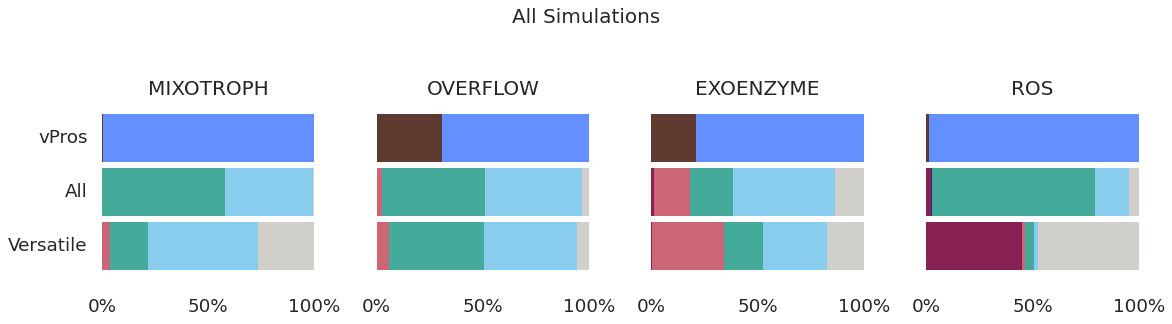

In [76]:
sns.set_context('talk')
fig, axes = plt.subplots(1,4, figsize=(15,4), sharex=True , sharey=True)
for ax,m in zip(axes,morder):
    t = newcdf.loc[newcdf.model.isin([m])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('All Simulations', y=1.03)
plt.tight_layout()
plt.show()


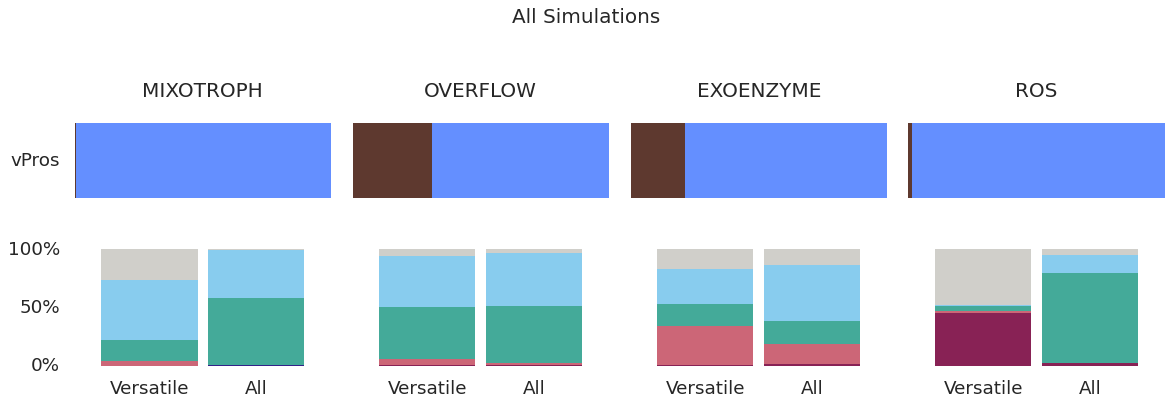

In [108]:
sns.set_context('talk')
fig, axes = plt.subplots(2,4, figsize=(15,5), sharex='row' , sharey='row')
for idx,m in enumerate(morder):
    ax=axes[0,idx]
    t = newcdf.loc[newcdf.model.isin([m]) & newcdf.analysis.isin(['vPros'])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, #xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax=axes[1,idx]
    t = newcdf.loc[newcdf.model.isin([m]) & ~newcdf.analysis.isin(['vPros'])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title='',ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, yticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('All Simulations', y=1.03)
plt.tight_layout()
plt.show()


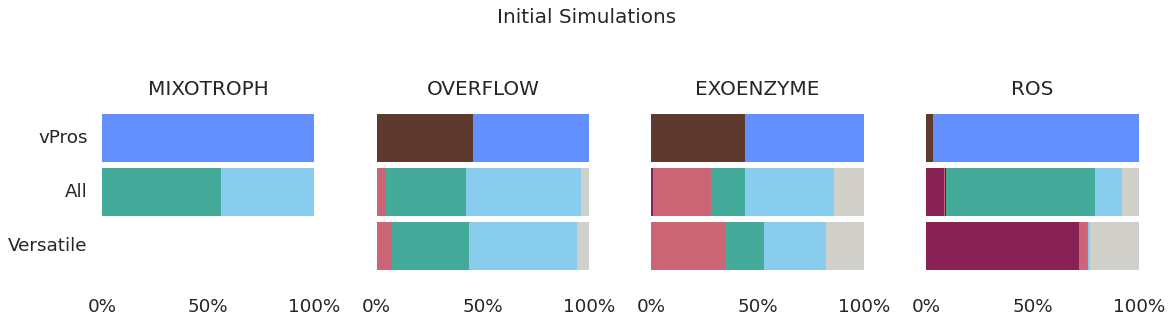

In [77]:
sns.set_context('talk')
fig, axes = plt.subplots(1,4, figsize=(15,4), sharex=True , sharey=True)
for ax,m in zip(axes,morder):
    t = newcdfi.loc[newcdfi.model.isin([m])]
    t.index = t.analysis
    t[gorder+vorder1].plot(
        kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', title=m,ylabel='',
        # figsize=(2,2), 
        legend=False, ax=ax, xticks=(0,50,100,),
    )
    sns.despine(bottom=True, left=True)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.suptitle('Initial Simulations', y=1.03)
plt.tight_layout()
plt.show()


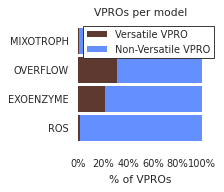

In [78]:
sns.set_context('paper')
vcount1_df.columns.name = None
vcount1_df.index.name = None
vcount1_df = vcount1_df.reindex(index=reversed(morder))

vcount1_df.plot(
    kind='barh', stacked=True, color=vpalette1, width=0.9,  rot=0, lw=0, xlabel='% of VPROs', title='VPROs per model',
     figsize=(2,2), #legend=False,
)
sns.despine(bottom=True, left=True)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())


In [79]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis
model,,,,,,,
ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249,All
EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174,All
OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457,All
MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606,All


In [80]:
count_ver_df.loc[count_ver_df.model.isin(morder)].groupby('model')[gorder].sum().sum(axis=1)


model
EXOENZYME    16813.0
MIXOTROPH      314.0
OVERFLOW     23598.0
ROS           1191.0
dtype: float64

In [81]:
count_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,622.0,8700.0,10,10217,24513,6828.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,82.0,3924.0,379,12798,32532,5247.0,EM,True,False,True,False
2,EXOENZYME-ROS,1776.0,12265.0,14,15275,24386,10494.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,3654.0,13799.0,33,26977,29094,14015.0,ERM,True,False,True,True
4,MIN,0.0,0.0,16,16142,6651,0.0,-,False,False,False,False
5,MIXOTROPH,0.0,12.0,56,21119,15344,179.0,M,True,False,False,False
6,OVERFLOW,99.0,1303.0,23,29791,27817,2175.0,O,False,True,False,False
7,OVERFLOW-EXOENZYME,882.0,18743.0,11,19872,54900,11675.0,EO,False,True,True,False
8,OVERFLOW-EXOENZYME-MIXOTROPH,1629.0,21806.0,786,20621,61691,14339.0,EOM,True,True,True,False
9,OVERFLOW-MIXOTROPH,47.0,2509.0,240,36987,56449,3214.0,OM,True,True,False,False


In [82]:
count_ver_df

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS
0,EXOENZYME,37.0,5675.0,4,3131,5080,2886.0,E,False,False,True,False
1,EXOENZYME-MIXOTROPH,3.0,2672.0,286,1620,4975,2263.0,EM,True,False,True,False
2,EXOENZYME-ROS,252.0,10188.0,7,4859,6417,4757.0,ER,False,False,True,True
3,EXOENZYME-ROS-MIXOTROPH,269.0,13140.0,4,7174,7837,7901.0,ERM,True,False,True,True
4,MIXOTROPH,0.0,12.0,0,56,162,84.0,M,True,False,False,False
5,OVERFLOW,78.0,1263.0,2,10620,10246,1389.0,O,False,True,False,False
6,OVERFLOW-EXOENZYME,25.0,13098.0,2,5088,11199,4865.0,EO,False,True,True,False
7,OVERFLOW-EXOENZYME-MIXOTROPH,5.0,12317.0,259,5035,9789,4462.0,EOM,True,True,True,False
8,OVERFLOW-MIXOTROPH,30.0,2361.0,102,10526,14212,1958.0,OM,True,True,False,False
9,OVERFLOW-ROS,711.0,1775.0,8,13444,7964,5019.0,OR,False,True,False,True


In [83]:
cdf

,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis
model,,,,,,,
ROS,2.412774,0.083808,0.074986,76.855895,16.029289,4.543249,All
EXOENZYME,1.222244,17.095697,0.019650,20.076636,48.168599,13.417174,All
OVERFLOW,0.161744,2.128807,0.037577,48.671742,45.446674,3.553457,All
MIXOTROPH,0.000000,0.032689,0.152547,57.529284,41.797875,0.487606,All


In [84]:
vcount_df

Versatile_STR,Versatile VPRO,Non-Versatile VPRO
MODEL,,
ERM,390,1087
OM,379,1283
EORM,347,920
OR,325,745
O,300,670
ORM,297,1073
EOR,292,734
EOM,284,1156
EO,279,857


In [85]:
vcount1_df

,Versatile VPRO,Non-Versatile VPRO,analysis
ROS,1.510989,98.489011,vPros
EXOENZYME,21.060842,78.939158,vPros
OVERFLOW,30.927835,69.072165,vPros
MIXOTROPH,0.322841,99.677159,vPros


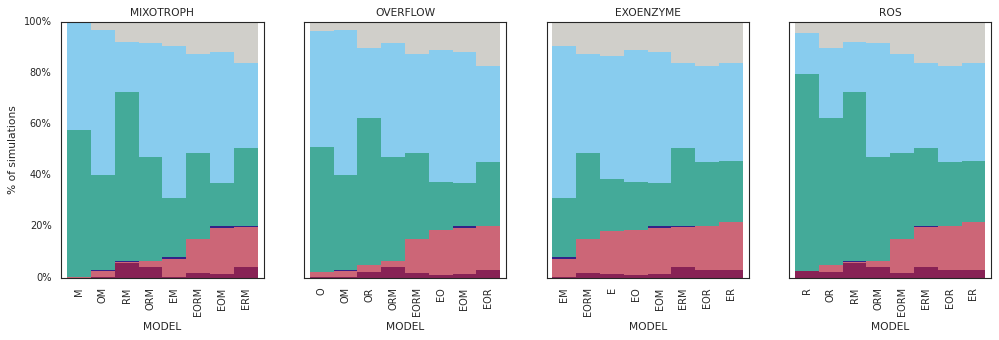

In [86]:
fig, axes = plt.subplots(1,4, figsize=(15,4) , sharey=True)# , sharey=True)

for m, ax in zip(morder, axes):
    
    cdf = count_df.loc[count_df[m]].copy()
    
    cdf.index=cdf.MODEL
    cdf = cdf[gorder].div(cdf[gorder].sum(axis=1), axis=0) * 100
    cdf['pos'] = cdf[['Strong','Sustained']].sum(axis=1)
    cdf['neg'] = cdf[['Inhibited','Weak']].sum(axis=1)
    cdf = cdf.sort_values(by=['pos', 'neg',])
    #cdf = cdf/ cdf[gorder].sum(axis=1)
    cdf[gorder].plot(
        kind='bar', stacked=True, color=gpalette, width=1, #figsize=(7,7), 
        #rot=0, 
        lw=0.01, ax=ax, legend=False, title=m, ylabel='% of simulations'
        
    )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    

In [87]:
vorder

['Versatile VPRO', 'Non-Versatile VPRO']

In [88]:
vpro_df['Versatile_STR_'] = pd.Categorical(vpro_df['Versatile_STR'], categories=reversed(vorder), ordered=True)

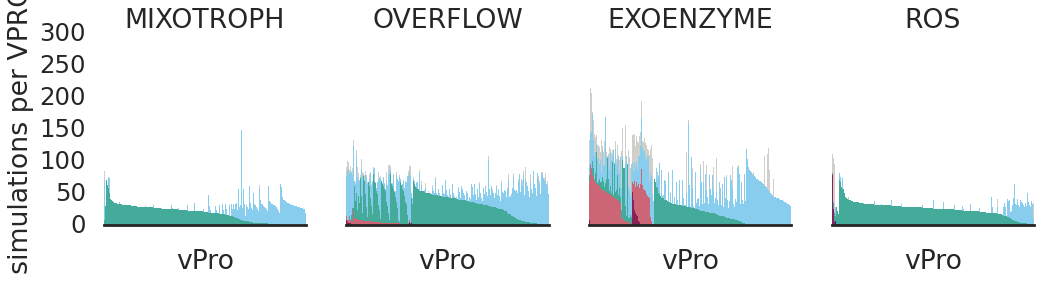

In [89]:
sns.set_context('poster')
fig, axes = plt.subplots(1,4, figsize=(15,3), sharey=True)# , sharey=True)
for i1,m1 in enumerate(morder):
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init','extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=axes[i1],) #fontsize=50)
        axes[i1].set(xticklabels=[], ylabel='simulations per VPRO', xlabel='vPro'
                    )
        axes[i1].set(title=m1)
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
sns.despine(left=True)

In [92]:
newcdfi

,model,Strong,Sustained,Inhibited,Weak,Neutral,Other,analysis,Versatile VPRO,Non-Versatile VPRO
0,ROS,71.698113,4.150943,0.000000,0.377358,0.754717,23.018868,Versatile,0.000000,0.000000
1,EXOENZYME,0.029446,35.129564,0.029446,17.815077,29.358068,17.638398,Versatile,0.000000,0.000000
2,OVERFLOW,0.193125,7.029741,0.000000,36.307455,50.675937,5.793743,Versatile,0.000000,0.000000
3,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Versatile,0.000000,0.000000
4,ROS,8.574007,0.496390,0.045126,70.442238,12.680505,7.761733,All,0.000000,0.000000
5,EXOENZYME,0.554412,27.578014,0.015840,16.014573,41.549184,14.287977,All,0.000000,0.000000
6,OVERFLOW,0.102020,3.713528,0.285656,37.788206,54.193022,3.917568,All,0.000000,0.000000
7,MIXOTROPH,0.000000,0.000000,0.000000,55.787714,44.212286,0.000000,All,0.000000,0.000000
8,MIXOTROPH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,0.000000,100.000000
9,OVERFLOW,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,vPros,45.454545,54.545455


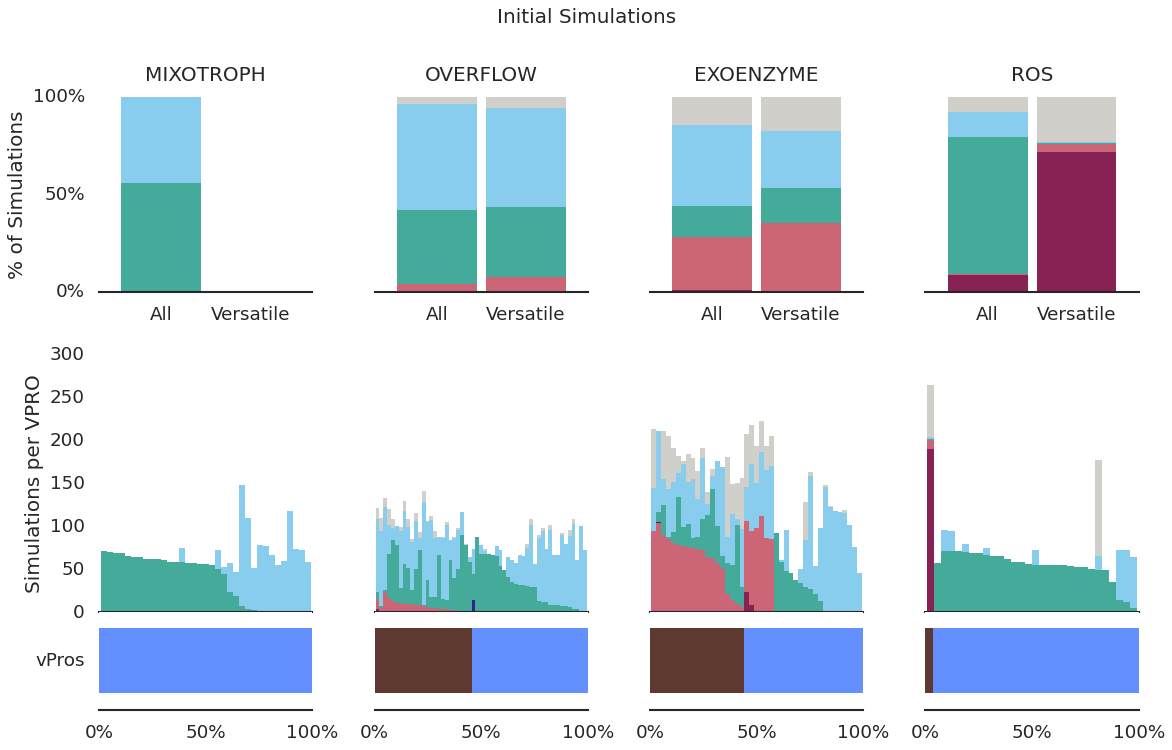

In [163]:
sns.set_context('talk')
fig, axes = plt.subplots(3,4, figsize=(15,9), sharey='row', sharex=False, height_ratios=[2,2, 1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[1,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=ax,) #fontsize=50)
        ax.xaxis.tick_top()
        ax.set(xticks=[], ylabel='Simulations per VPRO', xlabel=''
                    )
        #ax.spines.bottom.set_visible(False) 
        #ax.axis["top"].set_visible(False)
        ax = axes[2,i1]

        t = newcdfi.loc[newcdfi.model.isin([m1]) & newcdfi.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=1,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        ax = axes[0,i1]
        t = newcdfi.loc[newcdfi.model.isin([m1]) & ~newcdfi.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', 
            # figsize=(2,2), 
            legend=False, ax=ax, yticks=(0,50,100,), ylabel='% of Simulations'
        )
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.set(title=m1)
        ax.set_title(m1, pad=15)
#axes[0,0].set()
#axes[2,1].set_title('Simulation Outcomes')
plt.tight_layout()
for i in range(len(morder)):
    bbox0 = axes[1,i].get_position(original=True)  
    bbox1 = axes[2,i].get_position(original=True)  
    bbox0.y0 = bbox1.y1
    axes[1,i].set_position(bbox0, which='both')
plt.suptitle('Initial Simulations', y=1.05)
sns.despine(left=True)


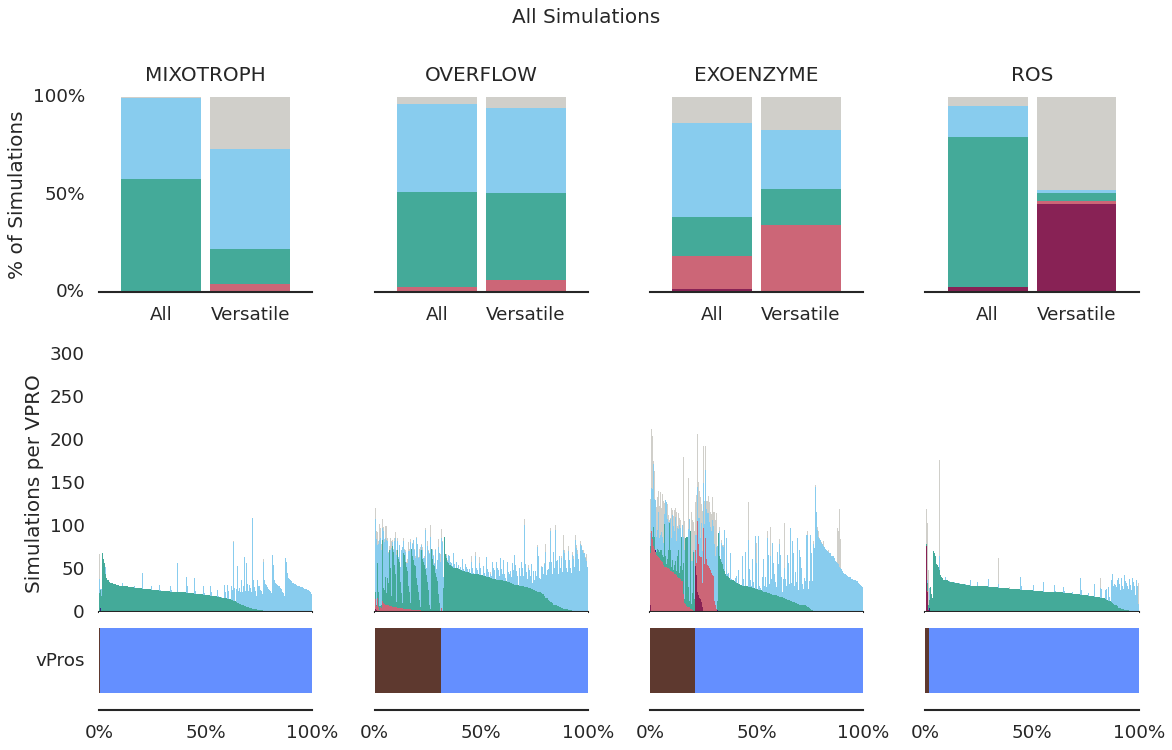

In [164]:
sns.set_context('talk')
fig, axes = plt.subplots(3,4, figsize=(15,9), sharey='row', sharex=False, height_ratios=[2,2, 1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[1,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init', 'extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=ax,) #fontsize=50)
        ax.xaxis.tick_top()
        ax.set(xticks=[], ylabel='Simulations per VPRO', xlabel=''
                    )
        #ax.spines.bottom.set_visible(False) 
        #ax.axis["top"].set_visible(False)
        ax = axes[2,i1]

        t = newcdf.loc[newcdf.model.isin([m1]) & newcdf.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=1,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        ax = axes[0,i1]
        t = newcdf.loc[newcdf.model.isin([m1]) & ~newcdf.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', 
            # figsize=(2,2), 
            legend=False, ax=ax, yticks=(0,50,100,), ylabel='% of Simulations'
        )
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.set(title=m1)
        ax.set_title(m1, pad=15)
#axes[0,0].set()
#axes[2,1].set_title('Simulation Outcomes')
plt.tight_layout()
for i in range(len(morder)):
    bbox0 = axes[1,i].get_position(original=True)  
    bbox1 = axes[2,i].get_position(original=True)  
    bbox0.y0 = bbox1.y1
    axes[1,i].set_position(bbox0, which='both')
plt.suptitle('All Simulations', y=1.05)
sns.despine(left=True)


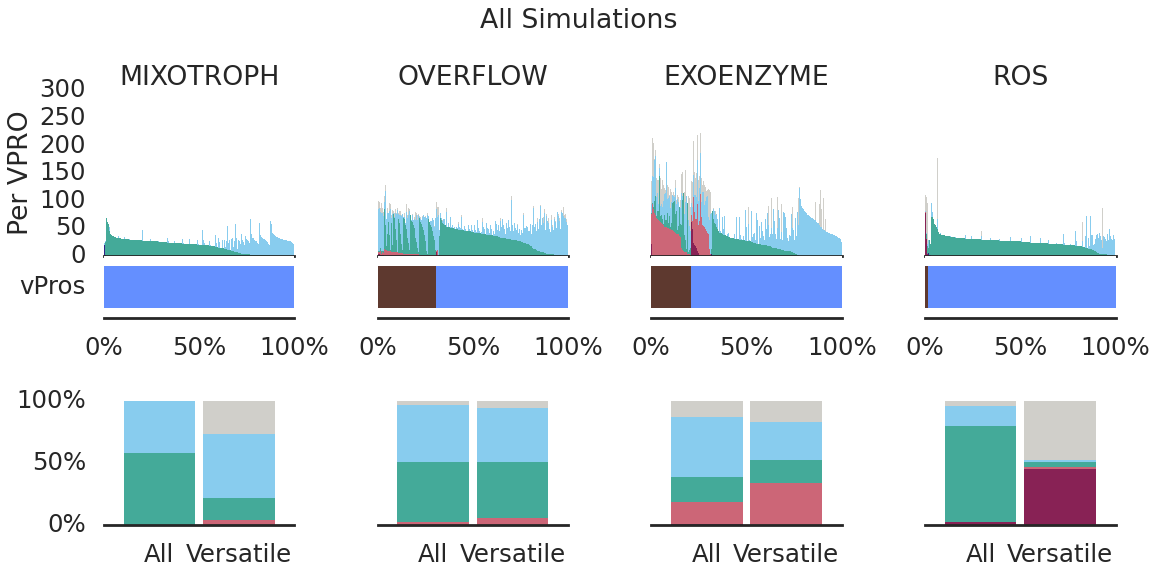

In [139]:
sns.set_context('poster')
fig, axes = plt.subplots(3,4, figsize=(15,7), sharey='row', sharex=False, height_ratios=[2,1.5,3])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[0,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init', 'extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=ax,) #fontsize=50)
        ax.xaxis.tick_top()
        ax.set(xticks=[], ylabel='Per VPRO', xlabel=''
                    )
        ax.set(title=m1)
        #ax.spines.bottom.set_visible(False) 
        #ax.axis["top"].set_visible(False)
        ax = axes[1,i1]

        t = newcdf.loc[newcdf.model.isin([m1]) & newcdf.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=1,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
        ax = axes[2,i1]
        t = newcdf.loc[newcdf.model.isin([m1]) & ~newcdf.analysis.isin(['vPros'])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='bar', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, yticks=(0,50,100,), 
        )
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
for i in range(len(morder)):
    bbox0 = axes[0,i].get_position(original=True)  
    bbox1 = axes[1,i].get_position(original=True)  
    bbox0.y0 = bbox1.y1
    axes[0,i].set_position(bbox0, which='both')

#plt.subplots_adjust(hspace=0)
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
plt.suptitle('All Simulations', y=1.05)
sns.despine(left=True)


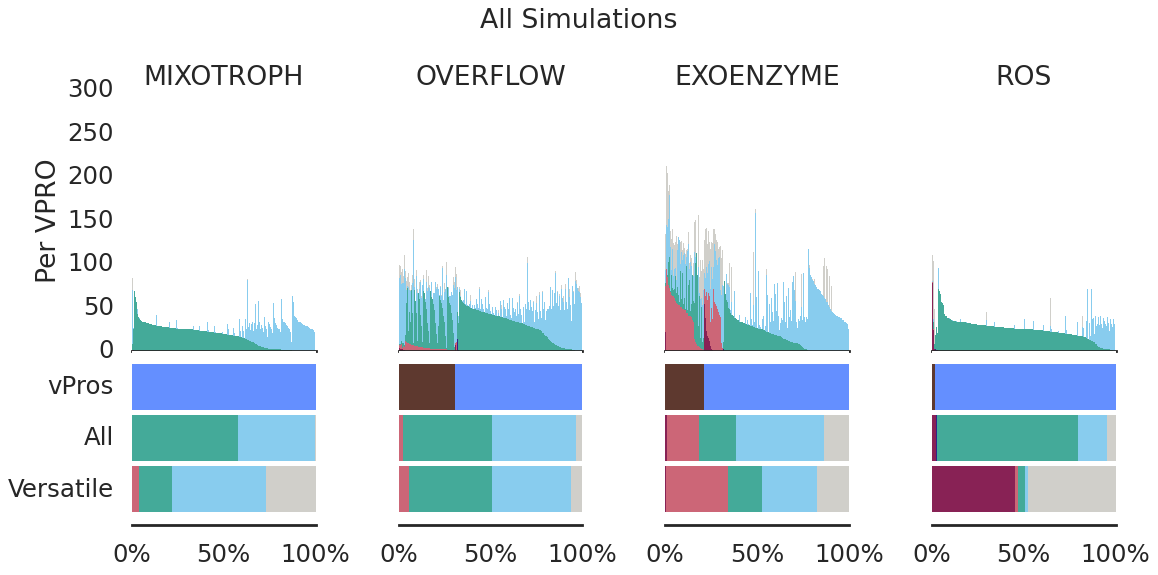

In [94]:
sns.set_context('poster')
fig, axes = plt.subplots(2,4, figsize=(15,7), sharey='row',  height_ratios=[1.5,1])# , sharey=True)
for i1,m1 in enumerate(morder):
        ax = axes[0,i1]
        tmpdf =vpro_df.loc[vpro_df.model.isin([m1]) & vpro_df.Phase.isin(['init', 'extend'])] #.sample(300) # .head(500)
        #tmpdf.index = tmpdf.VPRO
        tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+
                                  gorder, ascending=False)
        t=tmpdf[gorder]
        #t = t.sort_values(by=gorder, ascending=False)
        
        #_wedges, labels, percentages = 
        t.plot(kind='bar', stacked=True, legend=False,
             rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
             lw=0, ax=ax,) #fontsize=50)
        ax.set(xticklabels=[], ylabel='Per VPRO', xlabel=''
                    )
        ax.set(title=m1)
        ax.spines.bottom.set_visible(False) 
        #ax.axis["bottom"].set_visible(False)
        ax = axes[1,i1]

        t = newcdf.loc[newcdf.model.isin([m1])]
        t.index = t.analysis
        t[gorder+vorder1].plot(
            kind='barh', stacked=True, color=gpalette+vpalette1, width=0.9,  rot=0, lw=0, xlabel='', ylabel='',
            # figsize=(2,2), 
            legend=False, ax=ax, xticks=(0,50,100,),
        )
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.subplots_adjust(hspace=0)
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
plt.suptitle('All Simulations', y=1.05)
sns.despine(left=True)


In [95]:
vpro_df.loc[
    vpro_df.Versatile_STR.isin(['Versatile VPRO']) &
    #vpro_df.Inhibited.ge(1) & 
    vpro_df.Other.le(10) & 
    vpro_df.Strong.ge(3) & 
    vpro_df.Weak.ge(3) & 
    vpro_df.Sustained.ge(3) 
].sort_values(by=['% positive', 'neg_interaction']) # .VPRO.unique()#[gorder]

,model,Phase,VPRO,Inhibited,Neutral,Other,Strong,Sustained,Weak,pos_interaction,...,Versatile,simulations_per_VPRO,Versatile_STR,MODEL,MIXOTROPH,OVERFLOW,EXOENZYME,ROS,% positive,Versatile_STR_
7220,OVERFLOW,extend,vpro_3_46_74_OVERFLOW_C2__63_OVERFLOW,0,75,5.0,3.0,5.0,5,8,...,True,93.0,Versatile VPRO,O,False,True,False,False,0.086022,Versatile VPRO
6665,OVERFLOW,add,vpro_2_68_32_OVERFLOW_18,0,69,8.0,5.0,3.0,4,8,...,True,89.0,Versatile VPRO,O,False,True,False,False,0.089888,Versatile VPRO
6358,OVERFLOW,add,vpro_2_22_11_OVERFLOW_98,0,76,5.0,3.0,7.0,6,10,...,True,97.0,Versatile VPRO,O,False,True,False,False,0.103093,Versatile VPRO
6624,OVERFLOW,add,vpro_2_58_32_OVERFLOW_86,0,67,10.0,6.0,6.0,13,12,...,True,102.0,Versatile VPRO,O,False,True,False,False,0.117647,Versatile VPRO
10589,OVERFLOW-MIXOTROPH,extend,vpro_3_17_13_OVERFLOW-MIXOTROPH__54_OVERFLOW-M...,0,55,6.0,3.0,10.0,10,13,...,True,84.0,Versatile VPRO,OM,True,True,False,False,0.154762,Versatile VPRO


In [96]:
example_vpro = 'vpro_3_14_37_OVERFLOW-ROS-EXOENZYME__40_OVERFLOW-ROS-EXOENZYME'
example_vpro = 'vpro_19_33_ROS_C0_1023'
example_vpro = 'vpro_2_58_32_OVERFLOW_86'


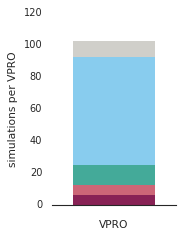

In [97]:
sns.set_context('paper')
fig, ax = plt.subplots(1,1, figsize=(2,3), sharey=True)# , sharey=True)
tmpdf =vpro_df.loc[vpro_df.VPRO.isin([example_vpro])] #.sample(300) # .head(500)
#tmpdf.index = tmpdf.VPRO
tmpdf = tmpdf.sort_values(by=['Versatile_STR_']+gorder, ascending=False)
t=tmpdf[gorder]
#t = t.sort_values(by=gorder, ascending=False)

#_wedges, labels, percentages = 
t.plot(kind='bar', stacked=True, legend=False,
     rot=0, width=1, cmap=ListedColormap(gpalette),  #ylabel='% of simulations', title=m,
     lw=0, ax=ax,) #fontsize=50)
ax.set(xticklabels=[], ylabel='simulations per VPRO', xlabel='VPRO'
            )
#ax.set(title=m1)
        
        #tmpdf.plot(kind='bar', stacked=True, color=gpalette, ax=axes[i1,i2], legend=False,)
sns.despine(left=True)

In [98]:
vpro_df.columns

Index(['model', 'Phase', 'VPRO', 'Inhibited', 'Neutral', 'Other', 'Strong',
       'Sustained', 'Weak', 'pos_interaction', 'neg_interaction', 'Versatile',
       'simulations_per_VPRO', 'Versatile_STR', 'MODEL', 'MIXOTROPH',
       'OVERFLOW', 'EXOENZYME', 'ROS', '% positive', 'Versatile_STR_'],
      dtype='object')

In [99]:
gorder1 = gorder[0:4]
gpalette1 = gpalette[0:4]

gorder1

['Strong', 'Sustained', 'Inhibited', 'Weak']

In [100]:
for i in gorder1:
    vpro_df[f'% {i}'] = vpro_df[i].div(vpro_df[gorder].sum(axis=1))*100

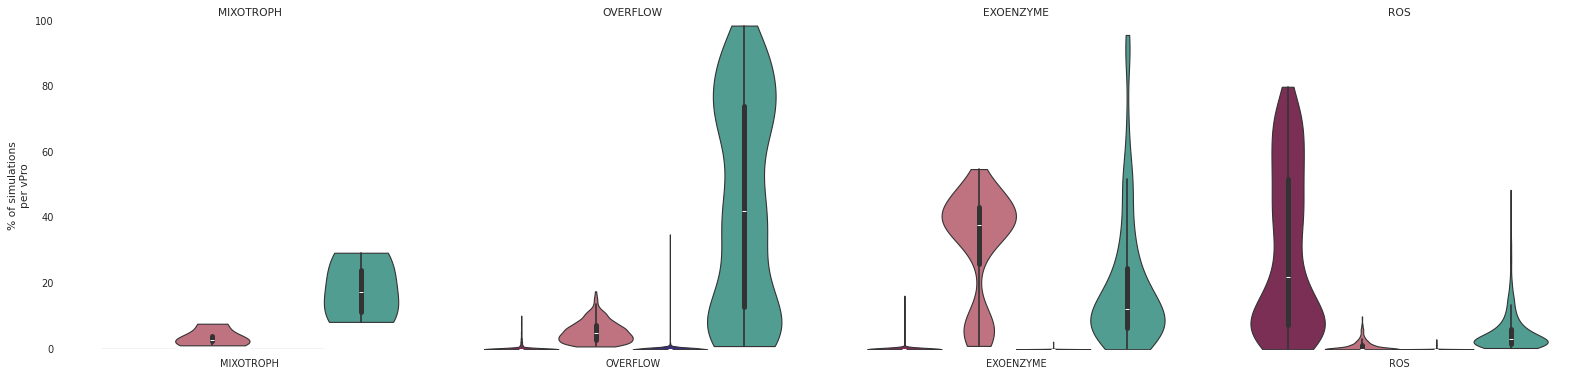

In [101]:
ylabel='% of simulations\nper vPro'
data = vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile
    ].melt(
        id_vars=['VPRO', 'model'], 
        value_vars=[f'% {i}' for i in gorder1],
        value_name=ylabel,
        var_name='y_pred'
    )
data['y_pred'] = data['y_pred'].map({f'% {i}':i for i in gorder1})

sns.catplot(
    data=data,
    col='model', col_order=morder, 
    x='model', sharex=False,#dodge=False,
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    y=ylabel,
    kind='violin', cut=0,
    legend=False,
).set_titles(col_template='{col_name}').set(xlabel='')
sns.despine(bottom=True, left=True)

In [102]:
data

,VPRO,model,y_pred,% of simulations\nper vPro
0,vpro_11_62_EXOENZYME_C1_20,EXOENZYME,Strong,0.000000
1,vpro_11_62_EXOENZYME_C1_46,EXOENZYME,Strong,0.000000
2,vpro_11_62_EXOENZYME_C1_54,EXOENZYME,Strong,0.000000
3,vpro_11_62_EXOENZYME_C1_70,EXOENZYME,Strong,0.000000
4,vpro_11_62_EXOENZYME_C1_98,EXOENZYME,Strong,0.000000
...,...,...,...,...
5071,vpro_2_19_33_ROS_C0_962_85_ROS,ROS,Weak,10.975610
5072,vpro_2_19_33_ROS_C0_962_9_ROS,ROS,Weak,7.042254
5073,vpro_2_19_33_ROS_C0_980_17_ROS,ROS,Weak,13.333333
5074,vpro_2_19_33_ROS_C0_980_32_ROS,ROS,Weak,7.894737


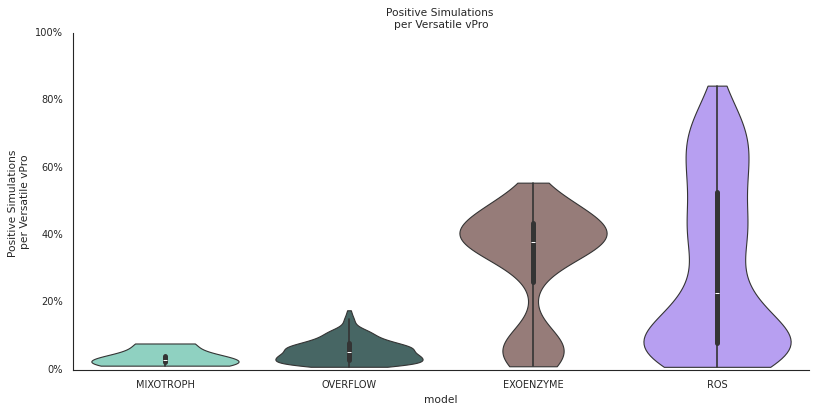

In [103]:
import matplotlib.ticker as mtick

g = sns.catplot(
    data=vpro_df.loc[vpro_df.model.isin(morder) & vpro_df.Versatile],
    x='model', order=morder, 
    hue='model', hue_order=morder, palette=mpalette,
    y='% positive',
    kind='violin', cut=0,
    aspect=2,
)
g.set(ylabel='Positive Simulations \nper Versatile vPro', ylim=(0,1), title='Positive Simulations \nper Versatile vPro',)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
